# Fuel  to Veg Mapping Analysis

This notebook looks at the relationship between Fuel and Vegetation.  Each Veg pixels has already been associated with one or more Fuel pixel as part of  Data Prep step using  the percent of overlapping area.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
Processed='WIFIRE/Processed_Data/Joins/'

In [3]:
# Import Veg & Fuel Joined data
VF10=pd.read_csv(Processed+'Join_Escondido_Veg2010_Fuel2010.csv')
VF12=pd.read_csv(Processed+'Join_Escondido_Veg2012_Fuel2012.csv')
VF14=pd.read_csv(Processed+'Join_Escondido_Veg2014_Fuel2014.csv')

In [4]:
#Import Veg and Fuel "decoder ring"
DecodeFuel=pd.read_csv('WIFIRE/Data_labels/fuel_labels.csv')
DecodeVeg=pd.read_csv('WIFIRE/Data_labels/veg_labels.csv')

In [5]:
DecodeFuel.columns=["filename",'id','fuelLabel']
DecodeFuel.head()

,filename,id,fuelLabel
0,FBFM1,1,Short Grass
1,FBFM2,2,Timber Grass
2,FBFM3,3,Tall Grass
3,FBFM4,4,Chaparral
4,FBFM5,5,Brush


In [6]:
DecodeVeg.columns=["id","vegLabel"]
DecodeVeg.head()

,id,vegLabel
0,3738,Open Water
1,3805,Water
2,3859,Water
3,3887,Water
4,3737,Snow-Ice


We will focus on those most frequently occuring vegetation

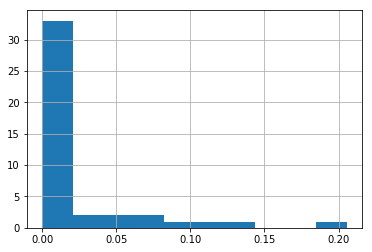

In [7]:
GBVeg10=VF10.groupby("Veg2010")["IndexVeg"].count().sort_values(ascending=False).reset_index()
TotalVeg10=VF10.shape[0]
GBVeg10["percentTotal"]=GBVeg10["IndexVeg"]/TotalVeg10
GBVeg10["percentTotal"].hist()

For now, we will only look at those vegetations that occur > 5% of the time in Escondido

In [8]:
Focus10=pd.merge(GBVeg10[GBVeg10["percentTotal"]>0.05],DecodeVeg,left_on='Veg2010', right_on='id',how='left')
Focus10

,Veg2010,IndexVeg,percentTotal,id,vegLabel
0,3092,179278,0.205415,3092,Southern California Coastal Scrub
1,3129,112002,0.128331,3129,California Central Valley and Southern Coastal...
2,3296,100096,0.114689,3296,Developed-Low Intensity
3,3299,88792,0.101737,3299,Developed-Roads
4,3297,68342,0.078306,3297,Developed-Medium Intensity
5,3914,54024,0.061900,3914,Western Warm Temperate Urban Shrubland
6,3913,51854,0.059414,3913,Western Warm Temperate Urban Herbaceous


Now lets do the same for 2012 and 2014 and see if  the same vegetation types appear

,Veg2012,IndexVeg,percentTotal,id,vegLabel
0,3092,113995,0.196863,3092,Southern California Coastal Scrub
1,3129,73190,0.126395,3129,California Central Valley and Southern Coastal...
2,3296,65591,0.113272,3296,Developed-Low Intensity
3,3297,58728,0.101420,3297,Developed-Medium Intensity
4,3299,58711,0.101391,3299,Developed-Roads
5,3914,38693,0.066821,3914,Western Warm Temperate Urban Shrubland
6,3913,31836,0.054979,3913,Western Warm Temperate Urban Herbaceous


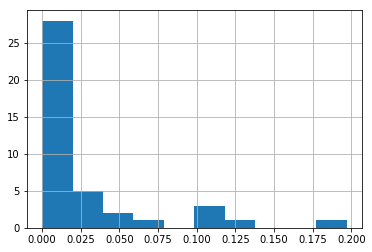

In [9]:
GBVeg12=VF12.groupby("Veg2012")["IndexVeg"].count().sort_values(ascending=False).reset_index()
TotalVeg12=VF12.shape[0]
GBVeg12["percentTotal"]=GBVeg12["IndexVeg"]/TotalVeg12
GBVeg12["percentTotal"].hist()

Focus12=pd.merge(GBVeg12[GBVeg12["percentTotal"]>0.05],DecodeVeg,left_on='Veg2012', right_on='id',how='left')
Focus12

,Veg2014,IndexVeg,percentTotal,id,vegLabel
0,3129,110650,0.189356,3129,California Central Valley and Southern Coastal...
1,3092,86162,0.147450,3092,Southern California Coastal Scrub
2,3296,66188,0.113268,3296,Developed-Low Intensity
3,3299,59450,0.101737,3299,Developed-Roads
4,3297,59344,0.101556,3297,Developed-Medium Intensity
5,3913,37506,0.064184,3913,Western Warm Temperate Urban Herbaceous
6,3914,33694,0.057661,3914,Western Warm Temperate Urban Shrubland


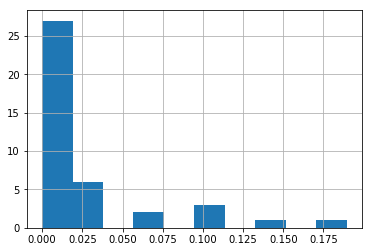

In [10]:
GBVeg14=VF14.groupby("Veg2014")["IndexVeg"].count().sort_values(ascending=False).reset_index()
TotalVeg14=VF14.shape[0]
GBVeg14["percentTotal"]=GBVeg14["IndexVeg"]/TotalVeg14
GBVeg14["percentTotal"].hist()

Focus14=pd.merge(GBVeg14[GBVeg14["percentTotal"]>0.05],DecodeVeg,left_on='Veg2014', right_on='id',how='left')
Focus14

Looks like  frequencies are pretty consistent between years.  We  will focus our analysis on  the following  frequently occuring  Vegetations in Escondido:
* Southern California Coastal Scrub
* California Central Valley and Southern Coastal Grassland
* Developed-Low Intensity
* Developed-Roads
* Developed-Medium Intensity
* Western Warm Temperate Urban Shrubland
* Western Warm Temperate Urban Herbaceous



Now, let  look at the mapping from  vegetation to  fuel.  

But remember that not all Fuel and Veg associations in the "Join" data sets are created  equal.  The field "percentOverlap"  shows the  percentage of Veg Pixel spatial area that is covered by the Fuel pixel.  For each vegeation type, we will groupby Fuel  types and sum the  percentOverlap (which is percentatge of a pixel with that label).  That will give us the total number fuel pixels associated with that  particular vegetation type

In [11]:
# Add Fuel and Veg text labels
VF10=pd.merge(pd.merge(VF10,DecodeVeg,left_on='Veg2010', right_on='id',how='left'),DecodeFuel,left_on='Fuel2010',right_on='id',how='left')
VF12=pd.merge(pd.merge(VF12,DecodeVeg,left_on='Veg2012', right_on='id',how='left'),DecodeFuel,left_on='Fuel2012',right_on='id',how='left')
VF14=pd.merge(pd.merge(VF14,DecodeVeg,left_on='Veg2014', right_on='id',how='left'),DecodeFuel,left_on='Fuel2014',right_on='id',how='left')


In [12]:
def MapHist(VegID,VType):
    fig=plt.figure(figsize=(15,5))
    ax=fig.add_subplot(1,3,1)
    VF10[VF10["Veg2010"]==VegID].groupby("fuelLabel")["percentOverlap"].sum().plot(kind='bar')
    plt.title('2010')
    ax=fig.add_subplot(1,3,2)
    VF12[VF12["Veg2012"]==VegID].groupby("fuelLabel")["percentOverlap"].sum().plot(kind='bar')
    plt.title('2012')
    ax=fig.add_subplot(1,3,3)
    VF14[VF14["Veg2014"]==VegID].groupby("fuelLabel")["percentOverlap"].sum().plot(kind='bar')
    plt.title('2014')
    fig.suptitle('Vegetation = ' + VType, fontsize=14)

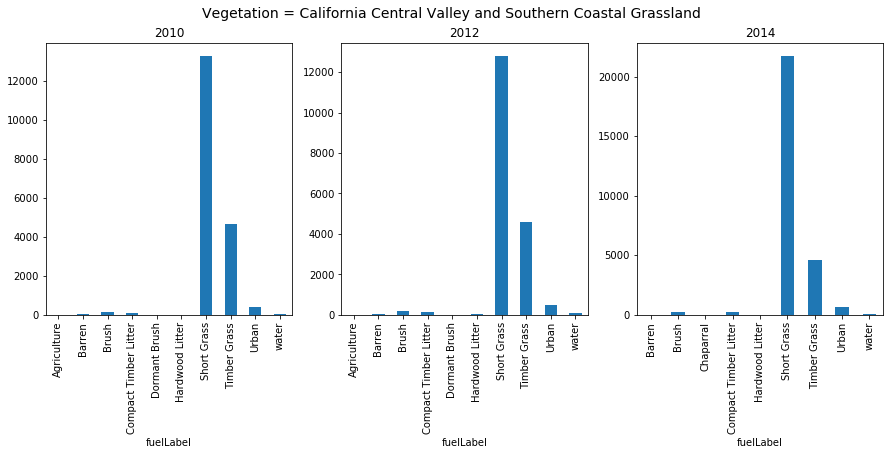

In [13]:
MapHist(3129,'California Central Valley and Southern Coastal Grassland')

Looks like  the Vegetation, California Central Valley and Southern Coastal Grassland maps  primarily to Short Grass and occasionally to Timber Grass.

What about the  other  Fuel types that appear  sporatically?  Let's check the percentOverlap, perhaps  they only intersect  California Central Valley and Southern Coastal Grassland pixels a little.

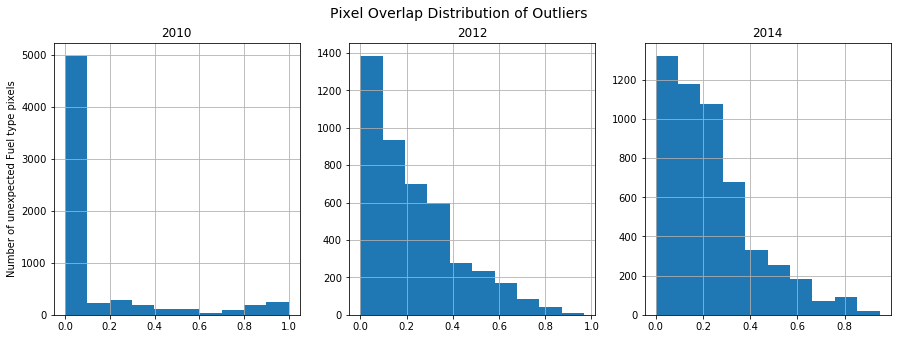

In [14]:
def HistOfNotFreq(df10,df12,df14):
    fig=plt.figure(figsize=(15,5))
    ax=fig.add_subplot(1,3,1)
    df10["percentOverlap"].hist()
    plt.title('2010')
    plt.ylabel('Number of unexpected Fuel type pixels')
    ax=fig.add_subplot(1,3,2)
    df12["percentOverlap"].hist()
    plt.title('2012')
    ax=fig.add_subplot(1,3,3)
    df14["percentOverlap"].hist()
    plt.title('2014')
    fig.suptitle('Pixel Overlap Distribution of Outliers', fontsize=14)

DF10=VF10[(VF10["Veg2010"]==3129)&(VF10["fuelLabel"]!="Short Grass")&(VF10["fuelLabel"]!='Timber Grass')]
DF12=VF12[(VF12["Veg2012"]==3129)&(VF12["fuelLabel"]!="Short Grass")&(VF12["fuelLabel"]!='Timber Grass')]
DF14=VF14[(VF14["Veg2014"]==3129)&(VF14["fuelLabel"]!="Short Grass")&(VF14["fuelLabel"]!='Timber Grass')]

HistOfNotFreq(DF10,DF12,DF14)


I'm going to assume any  of these "outlier" fuel pixels (not  Short Grass or Timber  Grass) that  overlaps less than 20% of the vegetation pixel is uninteresting.  Meaning I'm assuming that  the  veg to fuel mapping is strange just because  they don't share a large part of spatial area.  What is interesting are the pixels that do overlap a large area, particularly  those that  overlap >80%.  We want to look at these pixels on a map and see if maybe the fuel type is a mislabel.  To do that we need to create a TIFF file.

In [7]:
def ImportXYZ(FileName,labelName):
    DF=pd.read_table(FileName, header=None)
    DF.columns=['Row']
    DF["Long"]=DF["Row"].apply(lambda x: x.split(" ")[0])
    DF["Lat"]=DF["Row"].apply(lambda x: x.split(" ")[1])
    DF[labelName]=DF["Row"].apply(lambda x: x.split(" ")[2])
    del DF["Row"]
    return DF

Proc='WIFIRE/Processed_Data/VegFuel_Escondido/'
Fuel2010=ImportXYZ(Proc+'Clip_Fuel2010_Escondido.xyz','Fuel2010')

In [11]:
def MakeTiff(DF,IndexArray,label,outName):
    DF["Index"]=DF.index
    Hold=[]
    for index, row in DF.iterrows():
        if row["Index"] not in IndexArray:
            new=[row["Long"],row["Lat"],'-99']
        else:
            new=[row["Long"],row["Lat"],row[label]]
        Hold.append(new)
        
    MakeTIFF=pd.DataFrame(Hold,columns=["Long","Lat",label])
    
    MakeTIFF[["Long","Lat",label]].to_csv(outName+'.xyz',header=None, index=None, sep=' ', mode='a')
    gdal_str="/opt/anaconda3/bin/gdal_translate -a_srs wgs84 " + outName+'.xyz '+outName+'.tif'
    os.system(gdal_str)
    return MakeTIFF

In [12]:
#I want to look at all Fuel pixels associated with Veg=3129 pixels where the percentOverlap > 50%
IndexArray=VF10[(VF10["Veg2010"]==3129)&(VF10["percentOverlap"]>.5)]["IndexFuel"].values
TIFF3129=MakeTiff(Fuel2010,IndexArray,'Fuel2010','ViewFuel2010_VegType3129_Atleast50PercentOverlap')

I will work with Dan to view these TIFF Files on a map 

Let's move on the the other  vegetation types

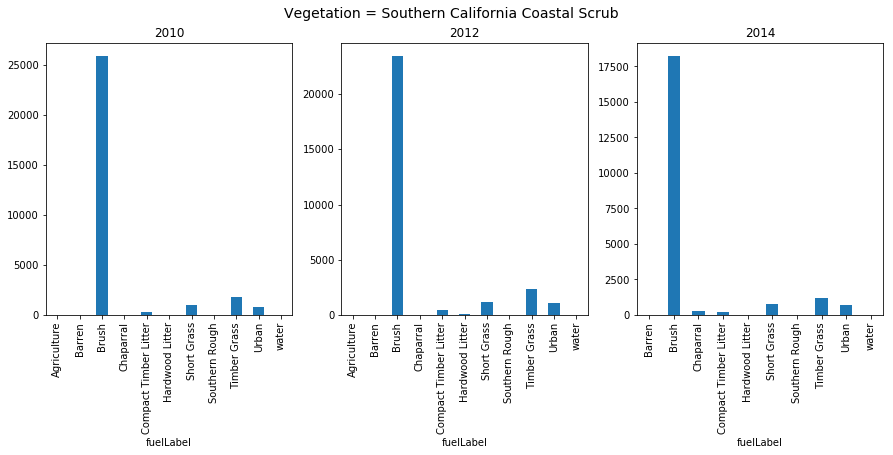

In [27]:
MapHist(3092,'Southern California Coastal Scrub')

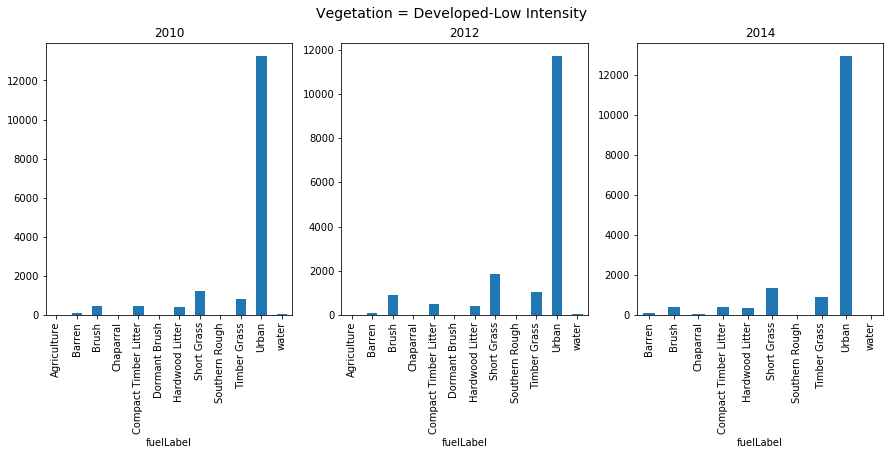

In [28]:
MapHist(3296,'Developed-Low Intensity')

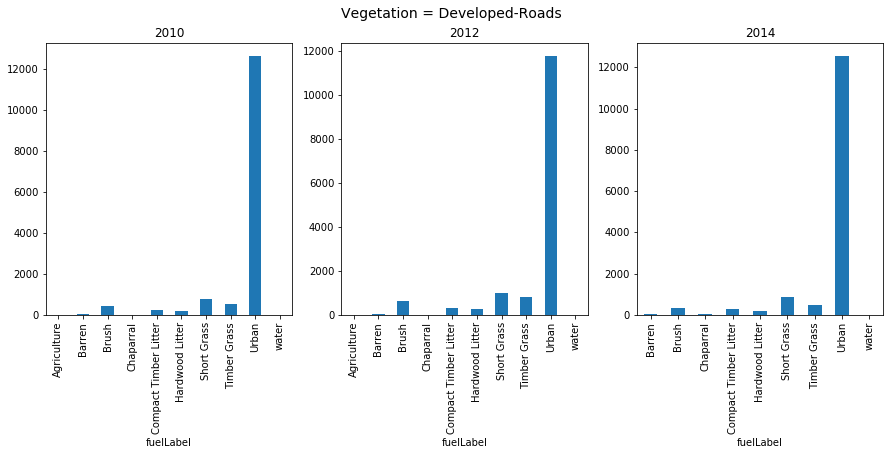

In [29]:
MapHist(3299,'Developed-Roads')

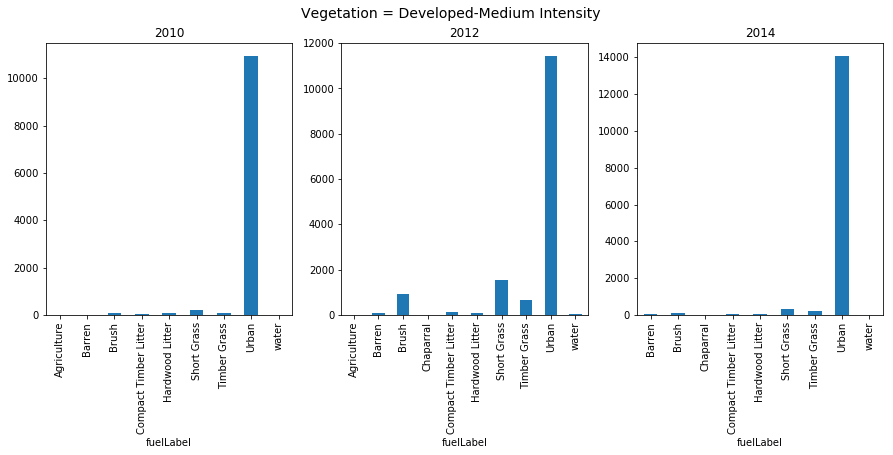

In [30]:
MapHist(3297,'Developed-Medium Intensity')

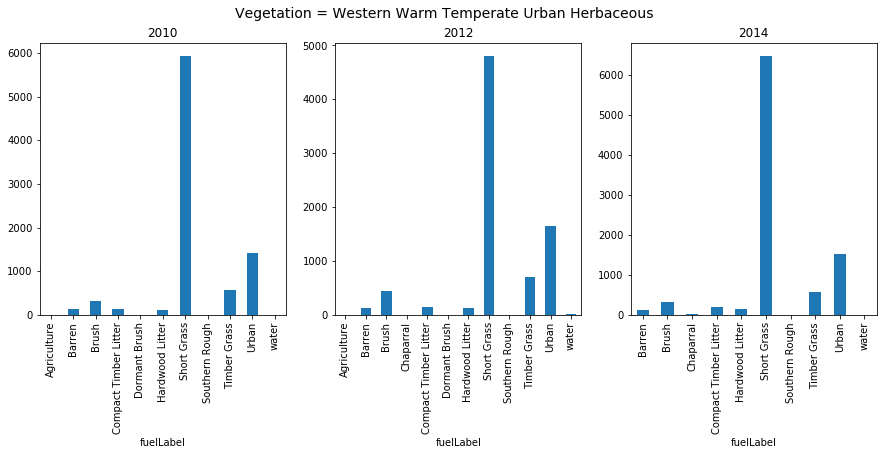

In [31]:
MapHist(3913,'Western Warm Temperate Urban Herbaceous')

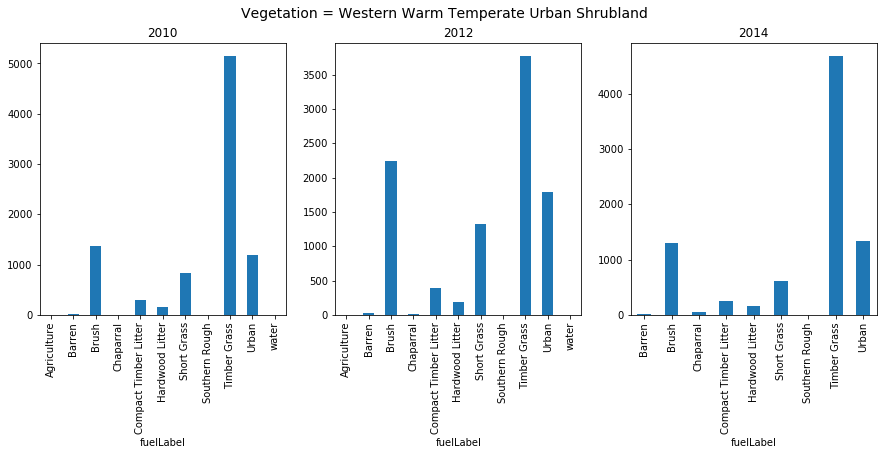

In [32]:
MapHist(3914,'Western Warm Temperate Urban Shrubland')

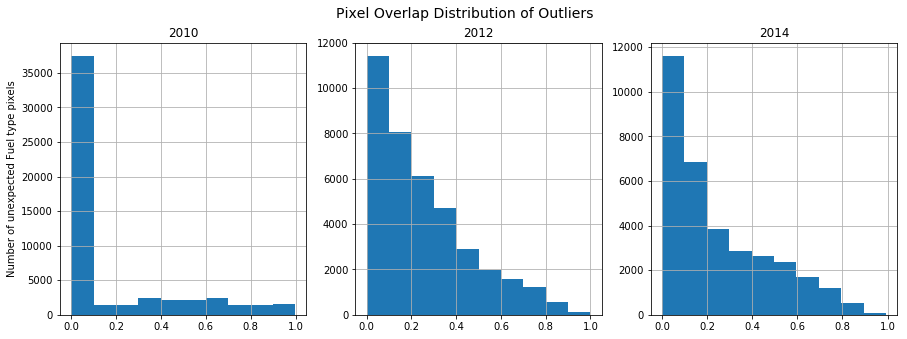

In [40]:
DF10=VF10[(VF10["Veg2010"]==3914)]
DF12=VF12[(VF12["Veg2012"]==3914)]
DF14=VF14[(VF14["Veg2014"]==3914)]

HistOfNotFreq(DF10,DF12,DF14)

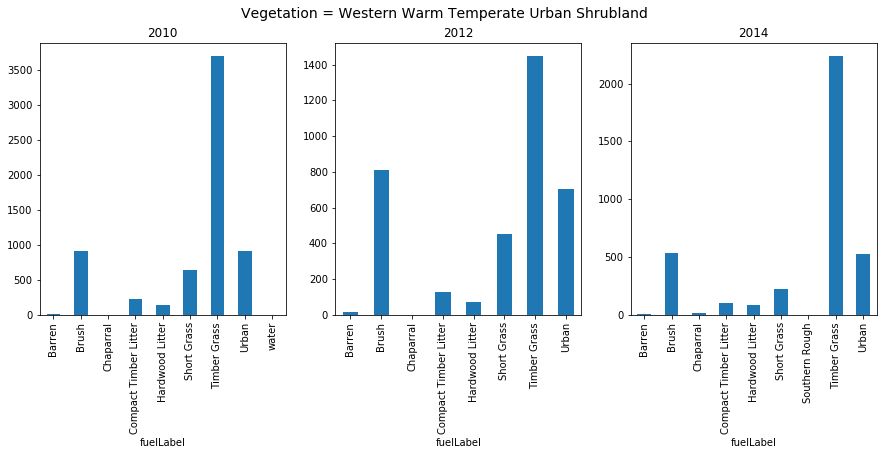

In [41]:
def MapHist_PO(VegID,VType,PO):
    fig=plt.figure(figsize=(15,5))
    ax=fig.add_subplot(1,3,1)
    VF10[(VF10["Veg2010"]==VegID)&(VF10["percentOverlap"]>PO)].groupby("fuelLabel")["percentOverlap"].sum().plot(kind='bar')
    plt.title('2010')
    ax=fig.add_subplot(1,3,2)
    VF12[(VF12["Veg2012"]==VegID)&(VF12["percentOverlap"]>PO)].groupby("fuelLabel")["percentOverlap"].sum().plot(kind='bar')
    plt.title('2012')
    ax=fig.add_subplot(1,3,3)
    VF14[(VF14["Veg2014"]==VegID)&(VF14["percentOverlap"]>PO)].groupby("fuelLabel")["percentOverlap"].sum().plot(kind='bar')
    plt.title('2014')
    fig.suptitle('Vegetation = ' + VType, fontsize=14)

MapHist_PO(3914,'Western Warm Temperate Urban Shrubland',0.5)

In [ ]:
#I want to look at all Fuel pixels associated with Veg=3914 pixels where the percentOverlap > 50%
Fuel2012=ImportXYZ(Proc+'Clip_Fuel2012_Escondido.xyz','Fuel2012')
Fuel2014=ImportXYZ(Proc+'Clip_Fuel2014_Escondido.xyz','Fuel2014')

IndexArray=VF10[(VF10["Veg2010"]==3914)&(VF10["percentOverlap"]>.5)]["IndexFuel"].values
TIFF3914=MakeTiff(Fuel2010,IndexArray,'Fuel2010','ViewFuel2010_VegType3914_Atleast50PercentOverlap')

IndexArray=VF12[(VF12["Veg2012"]==3914)&(VF12["percentOverlap"]>.5)]["IndexFuel"].values
TIFF3914=MakeTiff(Fuel2012,IndexArray,'Fuel2012','ViewFuel2012_VegType3914_Atleast50PercentOverlap')

IndexArray=VF14[(VF14["Veg2014"]==3914)&(VF14["percentOverlap"]>.5)]["IndexFuel"].values
TIFF3914=MakeTiff(Fuel2014,IndexArray,'Fuel2014','ViewFuel2014_VegType3914_Atleast50PercentOverlap')

## Mappings:
* California Central Valley and Southern Coastal Grassland:
    * Short Grass
    * Timber Grass
* Southern California Coastal Scrub:
    * Brush
* Developed-Low Intensity & Developed-Roads & Developed Medium Intensity:
    * Urban
* Western Warm Temperate Urban Herbaceous
    * Short Grass
    * Urban & Timber Grass also show up  a good amount
* Western Warm Temperate Urban Shrubland
    * Timber Grass
    * Brush
    * Urban
    *  Short Grass
